In [17]:
import numpy as np
import bs4 as BeautifulSoup
import missingno as msno
import pandas as pd
import requests
import json
import random

In [18]:
df=pd.read_excel('drama_data.xlsx')
df.drop('Unnamed: 0',axis=1,inplace=True)
#列名是 'Unnamed: 0'（中间有空格）

In [19]:
df.head()

,title,subTitle,score,order,time,table,area
0,鬼灭之刃 刀匠村篇,信念锻刃，尽斩恶鬼,9.2,1564.5万追番,2023-06-03 20:00:00,漫画改 奇幻 热血 战斗,日本
1,鬼灭之刃 游郭篇,斩断鬼所栖身的夜,9.7,1409.3万追番,2022-03-05 20:00:00,漫画改 热血 战斗 奇幻,日本
2,鬼灭之刃 无限列车篇,潜入无限的梦境中,9.8,1333万追番,2021-11-17 20:00:00,漫画改 热血 战斗 奇幻,日本
3,鬼灭之刃,谁都斩不断的羁绊,9.7,1267.4万追番,2019-04-07 00:00:00,漫画改 战斗 热血 声控,日本
4,咒术回战 第二季,天上天下，唯我独尊,9.4,1242.3万追番,2023-08-24 20:00:00,漫画改 热血 战斗 奇幻,日本


用图形可视化方式展示 df 中缺失值（NaN）的位置,快速整体观察缺失数据的分布、模式、是否随机等特性.

<Axes: >

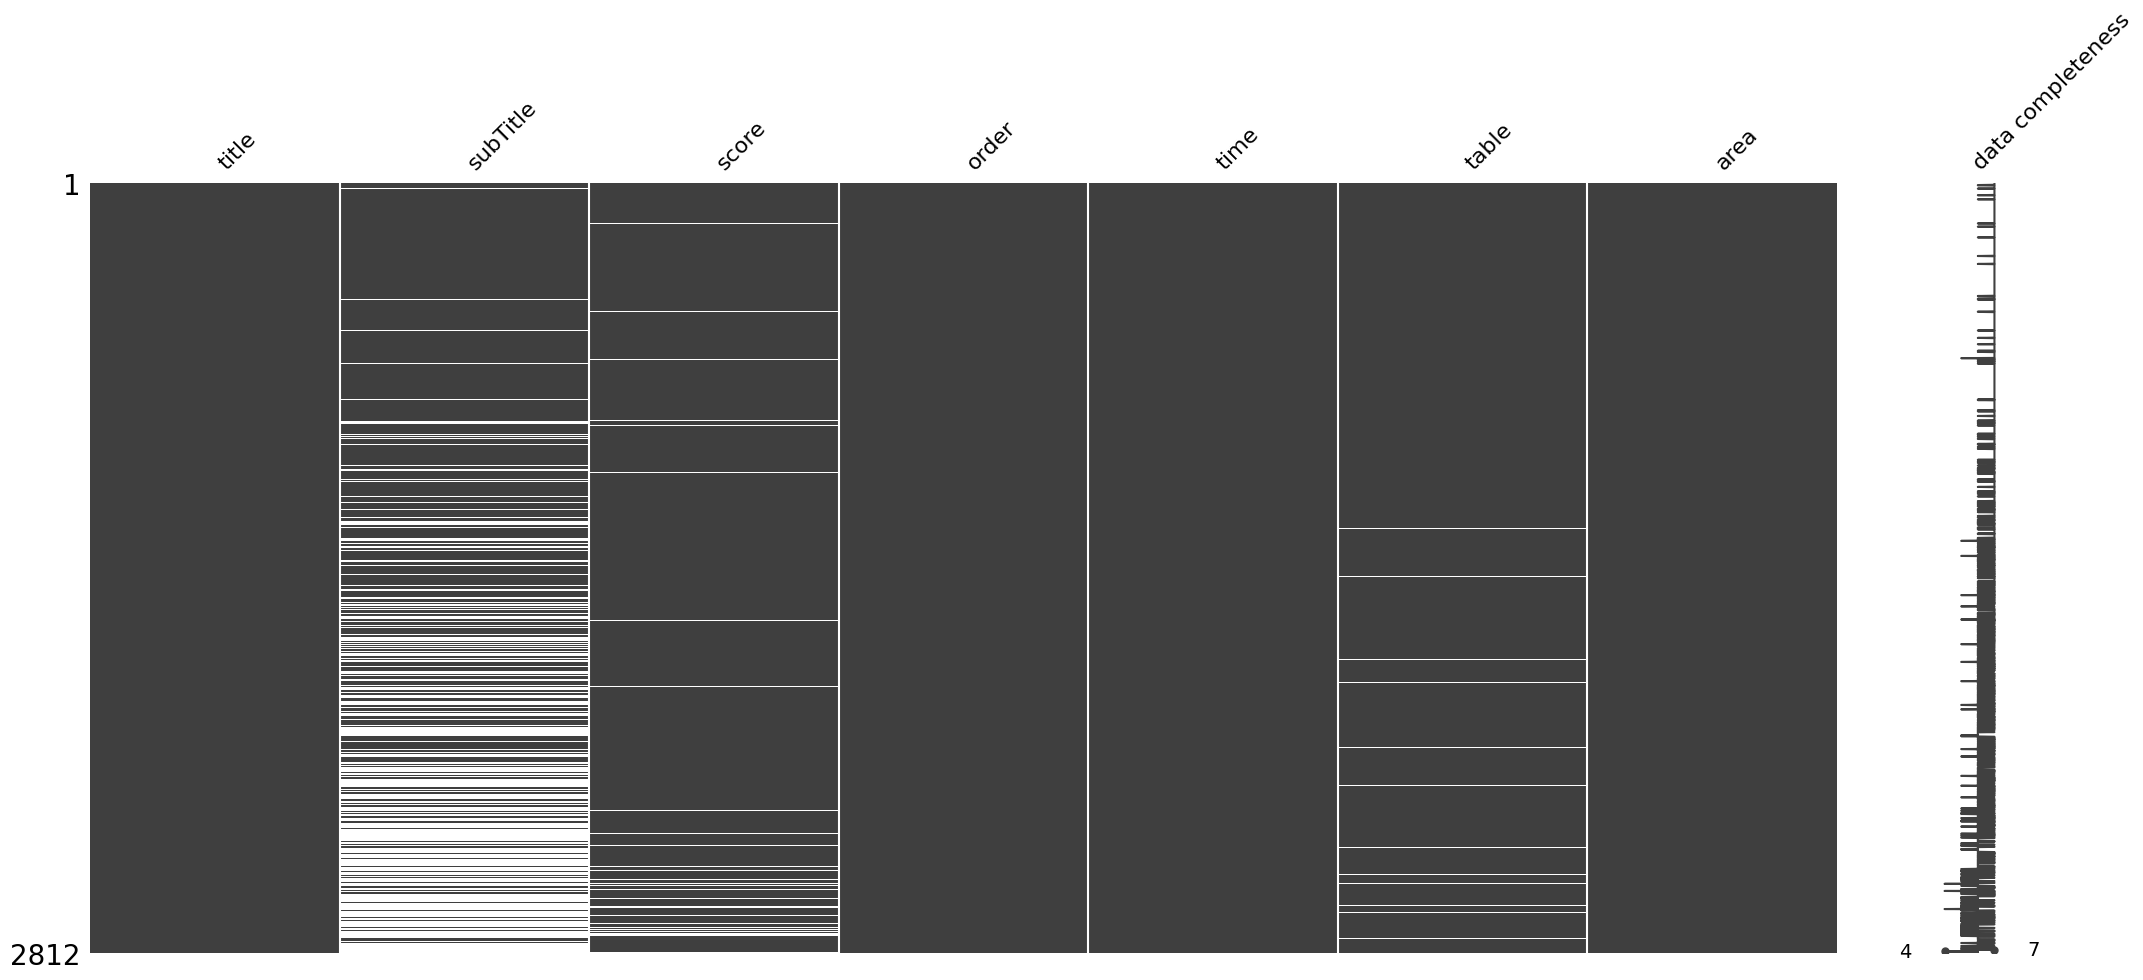

In [20]:
msno.matrix(df, labels=True)

统计每一列中有多少个缺失值（NaN）,具体查看每列缺失了多少个值，便于进一步填补或删除.

In [21]:
df.isna().sum()

title         0
subTitle    899
score       136
order         0
time          0
table        55
area          0
dtype: int64

可观察到subTitle(副标题)为空的动漫占比约三分之一,符合命名常理,数值占比影响较大,需清除一整列;  

score(评分)为空有两个原因:目前还未上架或者是评分人数过少,数量符合常理,可清除score为空的行;  

table(类型)为空的数据不多,由于直接删去会影响较多其他列数据，因此保留table为NaN的行，后面进行处理

从 DataFrame中筛选出 subTitle、score列中值为 NaN（缺失值）的所有行

In [22]:
df[df['subTitle'].isna()]

,title,subTitle,score,order,time,table,area
20,关于我转生变成史莱姆这档事 转生史莱姆日记,NaN,9.7,835.2万追番,2021-05-02 12:00:00,漫画改 日常 搞笑 穿越,日本
159,食戟之灵 餐之皿,NaN,9.4,344.1万追番,2017-10-03 00:00:01,美食 校园 搞笑 漫画改,日本
198,打了300年的史莱姆，不知不觉就练到了满级,NaN,9.5,301.1万追番,2021-04-10 21:30:00,小说改 穿越 奇幻,日本
412,忧国的莫里亚蒂 后半,NaN,9.7,158.2万追番,2021-03-28 20:00:00,漫画改 架空 声控 智斗,日本
425,圣女魔力无所不能,NaN,8.8,146.9万追番,2021-04-21 00:00:00,小说改 穿越 少女,日本
...,...,...,...,...,...,...,...
2806,我的女神 小不隆咚便利多多,NaN,9.6,1.9万追番,1998-04-06 00:00:00,时泪 治愈 奇幻,日本
2807,英国恋物语艾玛 第二幕,NaN,9.4,1.9万追番,2007-04-20 00:00:00,恋爱 治愈,日本
2808,交响情人梦 OAD,NaN,9.5,1.9万追番,2009-08-10 00:00:01,音乐 少女,日本
2809,佩琳物语,NaN,NaN,1.9万追番,1978-01-01 00:00:01,少女 日常 治愈,日本


In [23]:
df[df['score'].isna()]

,title,subTitle,score,order,time,table,area
7,间谍过家家 第二季,瓜神回归，哇酷哇酷,NaN,1213.6万追番,2023-11-30 00:00:01,漫画改 日常 搞笑,日本
8,辉夜大小姐想让我告白 剧场版,圣诞节的恋爱博弈！,NaN,982.5万追番,2023-04-30 00:00:01,漫画改 搞笑 恋爱 校园,日本
44,盾之勇者成名录 第三季,四圣勇者成长录,NaN,621万追番,2023-11-03 20:00:00,小说改 战斗 奇幻 穿越,日本
59,夏目友人帐 唤石者与怪异的访客（中配）,再次温暖你的心,NaN,562.8万追番,2023-07-08 00:00:00,漫画改 奇幻 治愈,日本
147,新世纪福音战士新剧场版：终,再见了所有的EVA,NaN,361.8万追剧,2023-01-20 12:00:00,剧情 科幻 动画,日本
...,...,...,...,...,...,...,...
2803,天保异闻妖奇士,NaN,NaN,1.9万追番,2006-10-07 00:00:00,历史 奇幻,日本
2805,战吼,NaN,NaN,1.9万追番,2006-01-07 00:00:01,NaN,日本
2809,佩琳物语,NaN,NaN,1.9万追番,1978-01-01 00:00:01,少女 日常 治愈,日本
2810,风-心之呼吸-,NaN,NaN,1.8万追番,2004-06-30 00:00:00,日常,日本


In [24]:
df[df['table'].isna()]

,title,subTitle,score,order,time,table,area
588,如果她的旗帜被折断了,折旗改变人生？,8.8,98.3万追番,2014-04-06 00:00:01,NaN,日本
639,新网球王子 U-17世界杯,龙马进军世界杯,NaN,85.5万追番,2023-10-08 12:00:00,NaN,日本
652,我的青春恋爱物语果然有问题 续 OVA,你的青春没有问题,9.8,82.8万追番,2016-10-27 00:00:01,NaN,日本
869,公主恋人！,平凡少年走上巅峰？,8.1,56万追番,2009-07-05 00:00:00,NaN,日本
963,Lostorage incited WIXOSS,冒险橘色打牌番,8.9,47万追番,2016-10-08 00:35:00,NaN,日本
1087,番剧茶会,番剧小编带你看番,8.8,37.6万追番,2016-04-07 00:00:01,NaN,中国大陆
1180,千年女优,今敏导演的集大成之作,9.8,31.6万追番,2001-07-28 00:00:01,NaN,日本
1261,11eyes,奇幻异能游戏改,5.7,27.5万追番,2009-10-06 00:00:01,NaN,日本
1306,四色战记 / RWBY 第九季,RWBY系列第九季,NaN,24.9万追番,2023-10-05 18:00:00,NaN,美国
1357,明日的与一,少年剑士修行物语,6.3,23.4万追番,2009-01-08 00:00:00,NaN,日本


In [25]:
df.drop(columns='subTitle',inplace=True)#删除subTitle列
df.dropna(subset=['score'],inplace=True)#保留score列，只删除该列有NA的行,subset 为“子集”，即只在指定的列中检查缺失值，但删除的仍然是行（默认 axis=0）

In [26]:
df = df.drop_duplicates(subset='title', keep='first')

去掉order列里的'万追番','万追剧',留下有效的数字  

检查是否存在'万'字,因为排行榜追剧/追番人数必然以万字计

In [27]:
df['order'] = df['order'].str.replace('万追番', '')
df['order'] = df['order'].str.replace('万追剧', '')
# 查找包含“万”的行
has_wan = df['order'].str.contains('万 ', na=False)#na=False 表示如果 order 列有缺失值（NaN），不报错，直接返回 False

# 打印包含“万”的行数
print('包含“万”的行数:', has_wan.sum())#has_wan 是一个布尔 Series,不是df的列

# 查看具体这些行
print(df[has_wan])#布尔索引


包含“万”的行数: 0
Empty DataFrame
Columns: [title, score, order, time, table, area]
Index: []


time包含年,日,月,时,分,秒,以及空格和其他符号,将其表示为只含年份的纯数字

In [28]:
df['time'] = df['time'].str[:4]

In [29]:
df.head()

,title,score,order,time,table,area
0,鬼灭之刃 刀匠村篇,9.2,1564.5,2023,漫画改 奇幻 热血 战斗,日本
1,鬼灭之刃 游郭篇,9.7,1409.3,2022,漫画改 热血 战斗 奇幻,日本
2,鬼灭之刃 无限列车篇,9.8,1333,2021,漫画改 热血 战斗 奇幻,日本
3,鬼灭之刃,9.7,1267.4,2019,漫画改 战斗 热血 声控,日本
4,咒术回战 第二季,9.4,1242.3,2023,漫画改 热血 战斗 奇幻,日本


In [30]:
df.to_excel('drama_data_cleaned.xlsx')

再次统计每一列中有多少个缺失值（NaN）

In [31]:
df.isna().sum()

title     0
score     0
order     0
time      0
table    49
area      0
dtype: int64

table为NaN数小于55,说明在清除score为NaN的行时或者清除重复的title时,同时清空了table为NaN的行,得到的结果符合预想  

数据清洗完成,接下来开始数据分析